In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [42]:
# import some data to play with
iris = datasets.load_iris()
x = iris.data[:,:2] # we ony take the first two features
y = iris.target

In [43]:
# we create an instance of SVM and fit out data. 
C = 1.0 # SVM regularization paramerter
svc = svm.SVC(kernel='linear', C=1, gamma= 'auto').fit(x,y)

In [44]:
# create a mesh to plot in
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max, h)) 

C:\Users\Windows\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'cmp'
  after removing the cwd from sys.path.


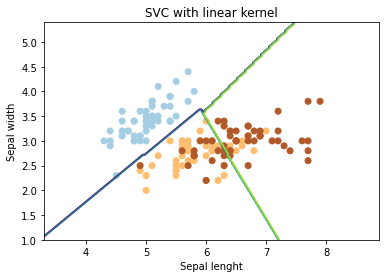

In [45]:
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy,z,cmp=plt.cm.Paired,alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)
svc = svm.SVC(kernel='sigmoid', C=1, gamma= 'auto').fit(x_train,y_train)


In [47]:
classification_results = svc.predict(x_test)
print(metrics.classification_report(classification_results,y_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.23      0.43      0.30         7
           2       1.00      0.34      0.51        38

    accuracy                           0.36        45
   macro avg       0.41      0.26      0.27        45
weighted avg       0.88      0.36      0.48        45



C:\Users\Windows\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[ 0  4 15]
 [ 0  3 10]
 [ 0  0 13]]


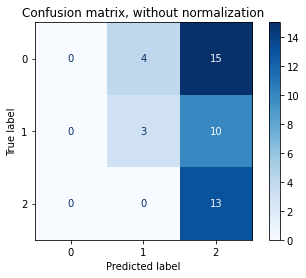

In [48]:
title_options = [("Confusion matrix, without normalization", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(svc, x_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)
plt.show()